# Conceitos básicos

Neste [Jupyter Notebook](http://jupyter.org/) vamos apresentar os conceitos básicos da linguagem Python. Ao contrário dos tutoriais clássicos, no lugar de introduzir os conceitos de tipos, operadores, classes direto no início, estes serão apresentados conforme nossa necessidade. Iniciamos como *sistema de importação* e partimos direto ao uso dos pacotes da família [SciPy](https://www.scipy.org/).

Você deve estar se perguntando sobre esse formato de arquivo que está lendo neste momento. [Jupyter Notebook](http://jupyter.org/) é uma forma de aprensentar código, equações e figuras de uma maneira integrada. Essa é uma ferramenta bastante popular em Ciência de Dados. Embora seja bastante conveniente para apresentação de resultados, a ferramenta pode ser um pouco inadequada no desenvolvimento, uma vez que cada célula de código deve ser executada individualmente (e isso pode conduzir a erros bem difíceis de explicar as vezes). Você pode salvar este *notebook* e executá-lo localmente com [Jupyter Notebook](http://jupyter.org/) ou [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/), ferramentas que podem ser instaladas com a interface de Anaconda Navigator.

Baixe este *notebook* <a href="notebooks/01-basics.ipynb" style="color: rgb(255,0,0);">aqui</a>.

## Sistema de importação

Python, como a maioria das linguagens de programação, é composta de um núcleo comum que *define* a linguagem e pacotes externos. Por exemplo, a linguagem define operações matemáticas básicas, funcionalidades de manipulação de texto (que pode ser mais importante do que você imagina em Ciência e Engenharia), utilidades para abrir e escrever arquivos, etc. Funções mais avançadas, com álgebra vetorial ou saídas gráficas, são providas em pacotes compilados pela *comunidade*.

Definir *comunidade* pode ser um pouco complexo. A comunidade é composta de programadores que desejam liberar seu código em domínio público, empresas que fazem o mesmo e organizações sem fins lucrativos que contribuem para a extensão da linguagem. Nesta série vamos empregar principalmente pacotes do grupo [SciPy](https://www.scipy.org/), que atualmente é suportado, dentre muitos outros pacotes que vão de cinética química a elementos finitos, pela organização [NumFOCUS](https://numfocus.org/).

Vamos realizar nossa primeira importação: necessitamos do pacote [NumPy](https://numfocus.org/project/numpy) para realizar operações com as estruturas de dados que vamos representar graficamente a seguir. Há em Python 3 principais formas de se importar um pacote e todas se assemelham a sintaxe com que se diria a instrução em inglês:

- ```python
import nome_do_pacote```

Nesta primeira forma pedimos a Python que deixe o pacote `nome_do_pacote` a disposição. Por vezes o nome do pacote é um pouco longo para digitarmos a cada vez que desejemos empregar uma de suas funcionalidades e para isso é provida a sintaxe

- ```python
import nome_do_pacote as abreviado```

na qual se espera que o novo nome `abreviado` seja mais curto que o original. Existe uma outra situação em que isso pode ser útil (bastante rara no entanto): renomear um pacote porque existem dois pacotes de mesmo nome que desejamos importar. Isso pode acontecer principalmente caso haja um sub-pacote que tenha o mesmo nome que outro pacote (mais comum em pacotes desenvolvidos dentro de uma empresa, por exemplo). Ainda temos a possibilidade de importar uma única funcionalidade ou sub-pacote de um pacote mais amplo, que é a forma recomendada em programas mais complexos

- ```python
from nome_do_pacote import sub_pacote```

ou ainda misturando a segunda e terceira formas temos

- ```python
from nome_do_pacote import sub_pacote as abreviado```

Alguns pacotes, como é o caso de NumPy, tem sua abreviatura *mais aceita* na comunidade, com a qual você vai encontrar online explicações acerca do pacote. Por isso realizamos sua importação como:

In [1]:
import numpy as np

No caso de [Matplotlib](https://matplotlib.org/), uma das bibliotecas que usaremos para traçar gráficos, o seu *módulo* `pyplot` é o que agrupa a interface de programas de aplicação (API) mais comum para *scripting*. A forma tradicional de se importar esses pacotes é

- ```python
import matplotlib.pyplot as plt
```

Minha recomendação pessoal é de que sub-pacotes/módulos sejam importados diretamente (o que torna o código mais legível de certa forma) e portanto empregaremos a seguinte sintaxe, sem o uso da abreviação ```as plt```, a qual você pode adicionar ao seu gosto.

In [2]:
from matplotlib import pyplot

A linha abaixo não faz realmente parte da linguagem Python. Trata-se de uma expressão chamada *magic* usada em *notebooks* para alguma modificação do seu comportamento. Neste caso específico a expressão faz com que gráficos gerados com `matplotlib` apareçam embutidos aqui no *notebook* como se fosse uma página web, ao invés de abrir uma nova janela, o que é o comportamento padrão.

In [3]:
%matplotlib inline

## Primeiros gráficos

### Escolha do estilo

Embora não seja usual começar por apresentar os estilos disponíveis em `matplotlib`, acredito ser mais animador para quem está estudando ver que resultados são possíveis desde o início. O estilo padrão é demasiadamente desprovido de qualidade gráfica para usos além da simples visualização enquanto tratando dados. Para acessar os estilos disponíveis (que dependem da sua instalação e versão de `matplotlib`, você podendo também [adicionar seus próprios estilos](https://matplotlib.org/users/customizing.html)) entramos o comando a abaixo.

O retorno dado por esse comando é uma `list`, um tipo de dado padrão de Python. Cada elemento desta lista é uma *string* `str`, ou seja um elemento de texto fechado por aspas.

In [4]:
pyplot.style.available

['bmh',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-dark',
 'seaborn-muted',
 'Solarize_Light2',
 'dark_background',
 'seaborn-talk',
 'tableau-colorblind10',
 'seaborn-white',
 'seaborn-colorblind',
 'grayscale',
 'fast',
 'seaborn-paper',
 'classic',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-notebook',
 '_classic_test',
 'ggplot',
 'seaborn',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-poster']

De maneira arbitrária escolhi o estilo `'fivethirtyeight'` para este tutorial. Este estilo é mais comum em aplicações financeiras e corporativas. Para casos técnicos e científicos recomendaria `'bmh'` e `'ggplot'` com algumas customizações que veremos conforme progredimos. Para aplicar um estilo empregamos o comando abaixo. Observe as aspas definindo o nome do estilo. Modifique o comando abaixo e retrace os gráficos para explorar um pouco os padrões disponíveis.

In [5]:
pyplot.style.use('fivethirtyeight')

### Gerando dados

Vamos gerar algumas funções para traçar usando o pacote `numpy`. O interesse desse pacote é a possibilidade de gerar a manipular dados em forma matricial/vetorial de maneira bastante simples. Além disso, `numpy` provê funções canônicas com seno e cosseno que operam sobre todos os elementos de um `array` (termo que usaremos para a representação de um vetor ou matriz) de uma vez e retornam um novo `array` com o resultado. Vamos criar nosso eixo $x$ como, por exemplo, $100$ pontos igualmente espaçados no intervalo $[0;\,100]$. Isso pode ser facilmente obtido usando a função [np.linspace](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html) com a seguinte sintaxe (em que separamos os argumentos da função por vírgulas, sendo o separador decimal em Python o ponto):

In [6]:
x = np.linspace(0, 10, 100)
print(x)

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

Digamos agora que a função que estamos estudando seja $y=f(x)=x^2$. O operador para a exponenciação em Python é `**` (se você conhece alguma outra linguagem de programação eventualmente está se perguntando porque não um `^`, mas tal como em C/C++ esse operador tem outra finalidade). Como nosso `x` foi criado usando `numpy`, ele suporta operações sobre todo o conjunto de dados de uma forma quase *como se estivéssemos fazendo matemática no papel*. Para calcular nossa função `y` basta então escrevermos:

In [7]:
y = x ** 2

Não paremos por aí! Vamos criar mais alguns dados para poder melhor ilustrar como se trabalha com `matplotlib` na sequência. Introduzimos aqui as funções $z=x^2\sin(x)$ e $w=x^2\cos(x)$. Como $y=x^2$ podemos escrever essas funções diretamente fazendo seu uso em conjunto com as respectivas funções trigonométricas de `numpy`. **Nota:** Python por si só - sem empregar um pacote externo como `numpy` - provê funções matemáticas básicas e estatísticas. No entanto esses métodos não são amigáveis para a operação com vetores tal como estamos fazendo aqui e nos fariam passar por algumas etapas adicionais no aprendizado que pretendo deixar para mais tarde, como o conceito de *laços (loops)* e construção de listas.

In [8]:
z = y * np.sin(x)
w = y * np.cos(x)

### *Uma nota sobre LaTeX*

Na proposição desta série de tutoriais eu nada falei acerca de $\LaTeX$ (sim é assim que se deve escrever), uma linguagem de formatação de documentos muito usada por matemáticos e físicos (e alguns engenheiros). $\LaTeX$ é extremamente útil para escrever símbolos matemáticos, gregos, etc, usados com frequência em fórmulas. Como nosso objetivo é aprender a gerar gráficos que *falem* por si só e tenham qualidade de apresentação profissional (o que até hoje ninguém me convenceu que MS Excel tenha capacidade de fazer - e além do mais, tente traçar gráficos em Excel quando a base de dados ultrapassa 1 Gb em tempos razoáveis e sem se entediar), necessitamos de acesso à esses símbolos. Neste [link](https://en.wikibooks.org/wiki/LaTeX/Mathematics) você encontra algumas informações gerais acerca do uso desta ferramenta extremamente potente. 

Em uma máquina sem uma instalação local de $\LaTeX$, `matplotlib` suporta apenas algumas das suas funcionalidades, o que inclui o alfabeto grego, exponenciação e frações (o último a se evitar em legendas). Para escrever símbolos gregos, usamos o nome da letra (em inglês) precedido de uma barra invertida, por exemplo `\alpha` produz $\alpha$, `\beta` - $\beta$, `\gamma` - $\gamma$, etc.

Para escrever expoentes usamos `^`. Note que se o expoente for composto de mais de um caractére necessitamos representá-lo limitado por chaves `{}`. Para escrever $x^2$ fazemos `x^2`, mas para escrever $s^{-1}$ (que seria a boa prática para uma unidade *por segundo*) necessitamos de `s^{-1}`. Portanto, se desejarmos escrever uma velocidade em unidades SI podemos escrever `m\,s^{-1}`, resultando em $m\,s^{-1}$. Observe a `\,` nessa expressão, o que é usado para ajustar o espaço de maneira mais adequada em $\LaTeX$ (que por sua vez tenta colapsar caractéres para representar uma expressão ou o nome de uma mesma variável na ausência de operadores). Ao longo dos exemplos veremos mais símbolos e boas práticas.

**Nota**: para que o texto em $\LaTeX$ seja renderizado, é necessário que este encontre-se entre sifrões, tal como para gerar $m\,s^{-1}$ numa legenda escrevemos a *string* `'$m\,s^{-1}$'`. Se a legenda usada no código for `r'Velocidade ($m\,s^{-1}$)'` obteremos algo como *Velocidade ($m\,s^{-1}$)*. Isso ficará mais claro na sequência com os exemplos. O `r` que aparece *perdido* no início da legenda na verdade está dizendo para Python não interpretar os `\` como faria normalmente, sendo este um símbolo reservado para outras finalidades, que veremos mais tarde.

### O primeiro gráfico

Em posse de dados correspondente a um eixo coordenado e três funções avaliadas no **mesmo número de pontos**, vamos explorar as funcionalidades de [pyplot](https://matplotlib.org/api/pyplot_summary.html) para a geração de gráficos. Quais elementos que devem/podem estar presentes em um gráfico? Como `matplotlib` e seus módulos chamam tipicamente estes? Primeiramente, façamos um levantamento rápido e alguns comentários:

- **título**: um gráfico que apareça em uma apresentação de slides tipicamente leva um título no topo, o que no caso de um gráfico para um relatório ou artigo ciêntífico é substituído pela legenda. Para o título usamos [pyplot.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) que pode ser configurado para aparecer em diferentes posições e fontes/tamanhos.

- **títulos dos eixos**: os títulos dos eixos são fundamentais em gráficos que representem grandezas físicas em uma forma funcional (o que não seria o caso em um *pie-plot* por exemplo) e para inserí-los falamos das funções [pyplot.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel) e [pyplot.ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel). O argumento obrigatório dessas funções é uma `str` (texto entre aspas) com o texto a ser escrito. Essas funções aceitam $\LaTeX$ com o qual suas unidades físicas ou símbolos podem ser formatados.

- **legenda**: gráficos que contenham mais de uma curva devem necessariamente prover uma identificação a cada uma delas. Embora a função [pyplot.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) pareça (e de fato permita) ser a solução para esta tarefa, seu uso para essa finalidade não é a melhor prática. Na realidade reservamos `pyplot.legend` na maioria dos casos apenas para solicitar ao módulo que insira a legenda no gráfico e sua posição (veja na documentação no link que muito mais pode ser feito). Os elementos `label` inseridos nas chamadas das funções [pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) é que são usados na realidade. Esse tipo de parâmetro em que declaramos seu `nome=valor` são opcionais em Python e os chamamos `kwargs` que abrevia *keyword arguments*, argumentos de palavra-chave.

- **área do gráfico**: a área do gráfico é toda a região compreendendo as curvas, pontos, barras, etc que possa estar representando os dados. No caso de gráficos de funções frequentemente adicionamos prolongamentos dos marcadores dos eixos para ajudar na leitura das relações entre as grandezas relacionadas. Neste primeiro exemplo vamos empregar [pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) para traçar as três funções que calculamos acima. Essa função toma como argumentos os dois eixos a traçar e a *kwarg* `label`. A função plot possui diversos outros argumentos que exploraremos mais a fundo conforme avançamos no estudo. Você pode consultar sua documentação em [neste link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) para entender um pouco mais sobre toda a variedade de modificações possíveis.

- **marcadores dos eixos**: por enquanto vamos empregar os valores automaticamente providos por `pyplot`. Os formatos e os tipos de escala possíveis para os marcadores serão discutidos a seguir.

Finalmente, iniciamos um gráfico se assegurando que não restam outros dados na memória com `pyplot.close('all')`. Para que ele seja exibido realizamos uma chamada à `pyplot.show()`. Logo falaremos sobre como salvar figuras de qualidade em múltiplos formatos com [pyplot.savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig).

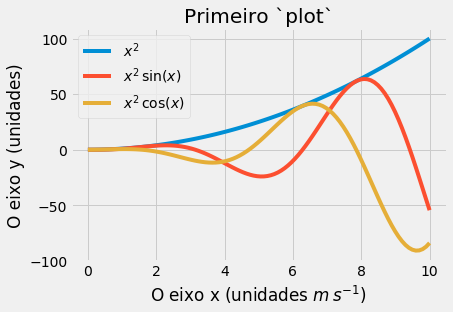

In [9]:
pyplot.close('all')
pyplot.title('Primeiro `plot`')
pyplot.plot(x, y, label='$x^2$')
pyplot.plot(x, z, label=r'$x^2\,\sin(x)$')
pyplot.plot(x, w, label=r'$x^2\,\cos(x)$')
pyplot.xlabel('O eixo x (unidades $m\\,s^{-1}$)')
pyplot.ylabel('O eixo y (unidades)')
pyplot.legend(loc='best')
pyplot.show()

### Usando fatias dos dados e multiplos gráficos

Uma outra situação possível é necessitarmos agrupar múltiplos gráficos em uma mesma figura, seja para comparar dados experimentais de maneira mais clara devido ao ruido de aquisição ou apenas dadas as diferentes escalas requeridas em um ou ambos os eixos para uma correta visualização. Neste caso recorremos a função [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot). A sintaxe deste método é bastante simples: realizamos a chamada da função com um trio de números inteiros, o primeiro representando o número de *linhas* de gráficos que desejamos em uma grelha, o segundo o número de *colunas* e finalmente o índice do gráfico (valor entre 1 e *linhas vezes colunas*).

No exemplo abaixo ilustramos como usar `pyplot.subplot` para traçar de duas formas diferentes a função `y`. Usamos este exemplo para introduzir também o conceito de fatias e índices. Quando criamos o *array* `x` com `numpy` mostramos na tela seus valores com a função `print` que faz parte do núcleo comum de Python. Podemos acessar elementos específicos de `x` através de seus índices. Em Python a indexação de *arrays* inicia em zero e vai até o tamanho do objeto menos um. Desta forma, com os valores de `x` mostrados numericamente acima, que valor deveria ser retornado de `x[2]` (o acesso a elementos se faz com colchetes como ilustrado aqui)? Esse é o terceiro elemento da lista e portanto `0.2020202` é esperado.

**Nota**: quando imprimimos o *array* `x`, seus valores foram dispostos por linhas e uma quebra de linha aplicada a cada 5 valores.

Essa é só uma das formas de se acessar elementos de *arrays* (que podem ter múltiplas dimensões, como veremos quando trabalharmos com imagens e cálculos multi-dimensionais). Imagine que você deseje apenas adicionar ao gráfico um elemento a cada dez. Isso é facilmente feito com a sintaxe `x[::10]`. Na verdade os espaços entre os dois pontos que deixamos sem valor são automaticamente ocupados pelo índice do primeiro e último elemento do *array*, o terceiro elemento fornecido representando o passo entre elementos. No exemplo abaixo, no *subplot 121 cortamos* os 20 primeiros e últimos 10 elementos de ambos os eixos (precisamos do mesmo número de pontos em ambos para não terminar com um erro) para ilustrar essa funcionalidade. Observe que índices negativos são aceitos, sendo o índice do último elemento da lista `-1` para evitar problemas com o primeiro indexado em `0` (senão o computador não poderia saber de que elemento estamos falando).

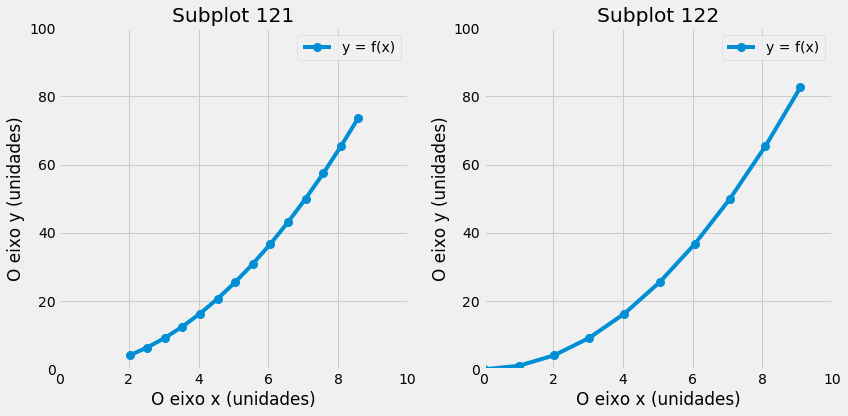

In [10]:
pyplot.close('all')

# Realize uma busca sobre esta função!
pyplot.figure(figsize=(12, 6))

# Aliás, tudo que venha depois de `#` em uma linha é um comentário!

pyplot.subplot(121)       # Tudo até a próxima *subplot* é o mesmo gráfico

# --- Bloco típico como no exemplo acima
pyplot.title('Subplot 121')
pyplot.plot(x[20:-10:5], y[20:-10:5], 'o-', ms=8, label='y = f(x)')
pyplot.xlabel('O eixo x (unidades)')
pyplot.ylabel('O eixo y (unidades)')
pyplot.xlim(0, 10)         # Controla início e fim do eixo x
pyplot.ylim(0, 100)        # Controla início e fim do eixo y
pyplot.legend(loc='best')  # Mude de 'best' para 1, 2, 3, 4, etc.

pyplot.subplot(122)

# ---
pyplot.title('Subplot 122')
pyplot.plot(x[::10], y[::10], 'o-', ms=8, label='y = f(x)')
pyplot.xlabel('O eixo x (unidades)')
pyplot.ylabel('O eixo y (unidades)')
pyplot.xlim(0, 10)
pyplot.ylim(0, 100)
pyplot.legend(loc='best')

# Aproxime mais os gráficos das bordas
pyplot.tight_layout()
pyplot.show()

### Outros tipos de gráficos

Há diversos outros tipos de gráficos padrão em `matplotlib`. Abaixo ilustramos um exemplo extremamente básico de um gráfico de barras. Consulte a documentação e complemente este *notebook* com mais tipos para discutirmos um pouco.

<BarContainer object of 100 artists>

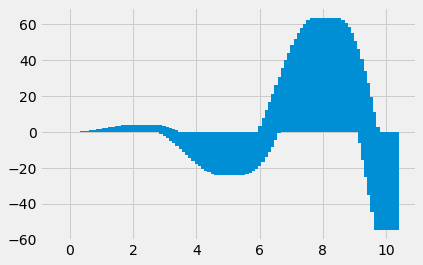

In [11]:
pyplot.bar(x, z)

No próximo *notebook* trataremos de práticas de gestão de dados experimentais e como preparar e ler arquivos para a geração de gráficos. Exploraremos as utilidades de *slicing (fatias)* introduzidas e mostraremos como utilizá-las para facilmente gerar gráficos de aproximações numéricas de derivadas, entre outros tópicos envolvendo representação de dados.

## Para os exploradores

Nesse começo ainda não posso saber como anda o apetite de vocês para avançar na linguagem. Para aqueles que se interessarem em outros tópicos além do que estamos abordando nesta série, seguem abaixo alguns links para progredir mais rápido:

- [Tutorial oficial](https://docs.python.org/3/tutorial/index.html): essa é a porta de entrada para a linguagem, principalmente para aqueles que já tiveram um contato mínimo com programação e conhecem alguma terminologia técnica da área. Recomendo uma vizualição do índice e salvar este link na barra de tarefas para consultas futuras.

- [RealPython](https://realpython.com/): talvez a melhor página para iniciantes na linguagem e um ponto de consulta para usuários mais experientes, os tutoriais são bem estruturados e acessíveis. Sempre um local de busca para aprender novas aplicações para a linguagem.

- [Estilo do código](https://www.python.org/dev/peps/pep-0008/): embora esse seja nosso primeiro tutorial e não estejamos desenvolvendo módulos em Python, uma boa prática é conhecer o estilo recomendado da linguagem. Aprender a linguagem já respeitando essas práticas fará com a qualidade de seus códigos melhore exponencialmente. Esse documento é uma das razões pelas quais Python é provavelmente a linguagem de programação mais *humanamente legível* existente.

In [12]:
from IPython.core.display import HTML
HTML(open('notebook.css', 'r').read())